# Logistic Regression without Regularization

In [1]:
import helpers as hlp
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

## Configuration

In [2]:
# Configuration Parameters
learning_rate = 0.001
epochs = 20000
display_step = 1000

## Import Data

In [3]:
# Import data
train_data = np.loadtxt(
    "../../../data/ex2/ex2data1.txt", dtype="float64", delimiter=",")
train_x_unbiased = np.delete(train_data, -1, axis=1)
train_x = np.insert(train_x_unbiased, 0, 1, axis=1)
train_y = np.delete(train_data, np.s_[:-1], axis=1)

## Visualize Data

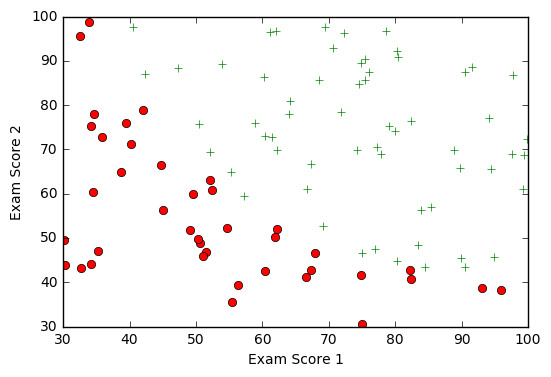

In [4]:
# Plot Data
labels = {
    "figure_label": "Exam Scores",
    "x_label": "Exam Score 1",
    "y_label": "Exam Score 2"
}
hlp.plot_classified_data(train_x, train_y, **labels)

## Define Model

In [5]:
# Parameters
x = tf.placeholder(tf.float64, name="x")
y = tf.placeholder(tf.float64, name="y")
theta = tf.Variable(
    tf.zeros(
        (train_x.shape[1], 1), dtype=tf.float64), name="theta")

m = train_x.shape[0]

# Model
hypothesis = tf.sigmoid(tf.matmul(x, theta))

# Cost function
cost = tf.reduce_sum(1 / m * (-y * tf.log(hypothesis) -
                              (1 - y) * tf.log(1 - hypothesis)))

# Optimizer
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(cost)

## Initialization

In [6]:
# Initialization
sess = tf.InteractiveSession()
tf.global_variables_initializer().run()
file_writer = tf.summary.FileWriter("logs/no-reg/run1", sess.graph)

## Run Model

In [7]:
for epoch in range(epochs):
    sess.run(optimizer, feed_dict={x: train_x, y: train_y})

## Results

Optimized Weights 
[[-17.13574984]
 [  0.1421311 ]
 [  0.136529  ]]

Accuracy: 89.0
Cost: 0.216644195519
Iterations: 19999


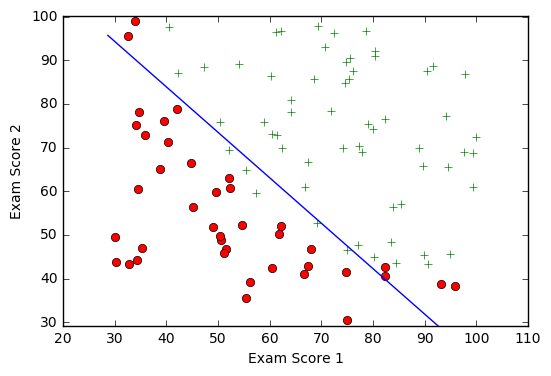

In [8]:
# Results
t = theta.eval()
print("Optimized Weights \n" + str(t) + "\n")
print("Accuracy: " + str(
    hlp.get_accuracy(
        np.round(hypothesis.eval(feed_dict={x: train_x})), train_y)))
print("Cost: " + str(cost.eval(feed_dict={x: train_x, y: train_y})))
print("Iterations: " + str(epoch))

# Decision Boundary
hlp.plot_decision_boundary(train_x, train_y, t, **labels)

## Close Session

In [9]:
sess.close()